In [1]:
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import functions_v3 as f
home_path = "C:\\Users\joche\FIM Kernkompetenzzentrum\Projekt VIdES - Dokumente\General\\07_Arbeitsordner\\04_Ergebnisse\\20220920_Ergebnisse_4_Wochen"
os.chdir(home_path)
%load_ext autoreload
%autoreload 2

In [9]:
def plot_mm_share(use_case_string):
    os.chdir(home_path)
    os.chdir(use_case_string)
    use_case_home_path = os.getcwd()
    use_case_nr = f.get_use_case_nr(use_case_home_path)
    df_mm = f.share_renewable_get_mm_quantity(use_case_home_path)
    avg_ = df_mm['mm_grey_energy [%]'].mean(axis=0)
    mm_to_cs_ = df_mm['mm_to_cs'].sum(axis = 0)
    cs_to_mm_ = df_mm['cs_to_mm'].sum(axis = 0)
    mm_grey_energy_ = df_mm['mm_grey_energy [kWh]'].sum(axis = 0)
    df_mm['mm_grey_energy [%]'].plot(figsize = (18,5), title = f'UC {use_case_nr}: mm_ger grey energy [%], avg: {round(avg_, 2)}, mm_to_cs: {round(mm_to_cs_,2)}, cs_to_mm: {round(cs_to_mm_, 2)}, mm_grey_energy: {round(mm_grey_energy_, 2)}')
    plt.show()
    return

In [6]:
os.chdir(home_path)
os.chdir('Use_Case_2')
use_case_home_path = os.getcwd()
df_mm = f.share_renewable_get_mm_quantity(use_case_home_path)
df_mm

,mm_to_cs,cs_to_mm,mm_grey_energy [kWh],mm_grey_energy [%]
2030-01-01T00:00,897.003658,126.140086,770.863572,0.859376
2030-01-01T01:00,862.596612,54.395752,808.200861,0.936940
2030-01-01T02:00,819.956331,52.628387,767.327944,0.935816
2030-01-01T03:00,874.718215,67.800323,806.917892,0.922489
2030-01-01T04:00,1016.573618,96.472307,920.101311,0.905101
...,...,...,...,...
2030-10-07T19:00,419.825924,238.479412,181.346512,0.431956
2030-10-07T20:00,282.527671,121.317839,161.209832,0.570598
2030-10-07T21:00,420.779551,236.162336,184.617216,0.438750
2030-10-07T22:00,421.166750,217.780065,203.386686,0.482912


In [15]:
ucs = ['Base_Case/', 'use_case_1/', 'Use_Case_2/', 'use_case_3/', 'use_case_4/', 'use_case_5/', 'use_case_6/']

In [36]:
dfs = []
for i in ucs:
    os.chdir(home_path)
    os.chdir(i)
    use_case_home_path = os.getcwd()
    use_case_nr = f.get_use_case_nr(use_case_home_path)
    df_mm_i = f.share_renewable_get_mm_quantity(use_case_home_path)
    df_out_i = df_mm_i.iloc[:,:-1].sum(axis=0)
    df_out_i = pd.DataFrame(df_out_i, columns=[f'UC{use_case_nr}: sum [kWh]'])
    dfs.append(df_out_i)

In [39]:
df_out = pd.concat(dfs, axis=1)
df_out.to_excel('2022 11 07 Trade volume overview.xlsx')

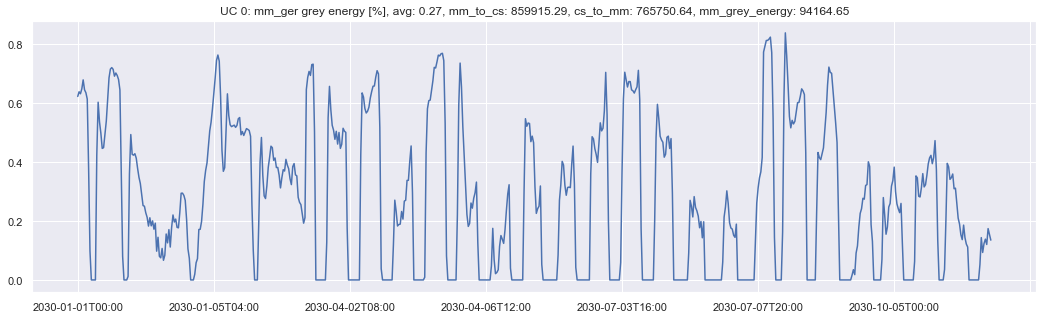

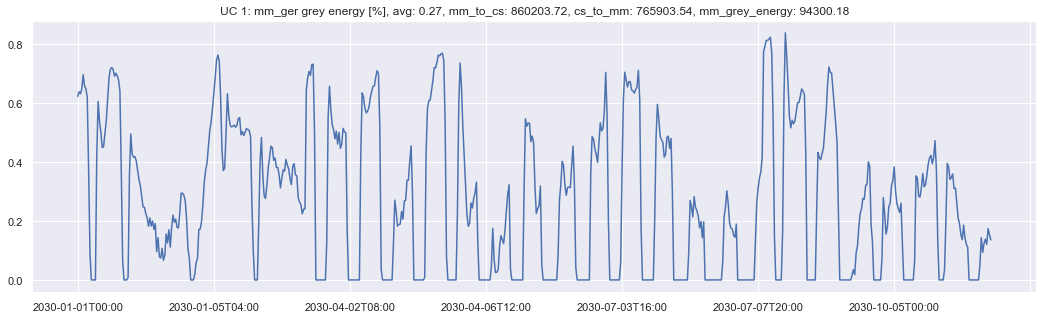

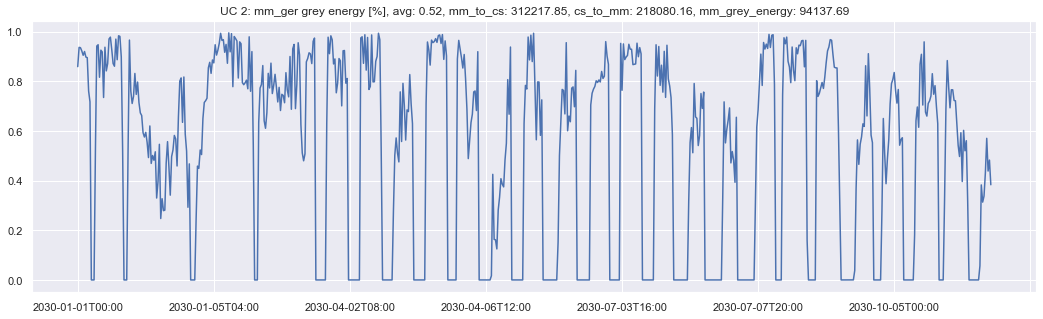

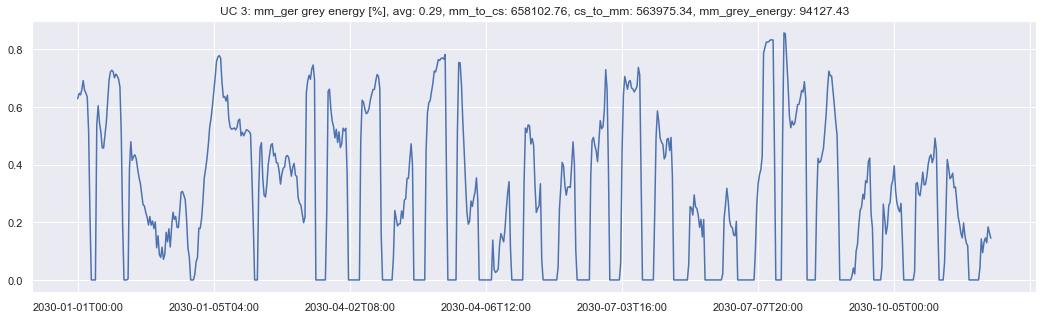

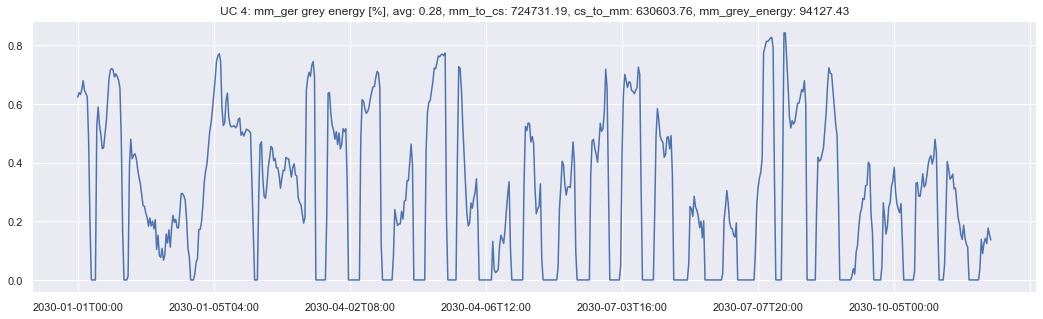

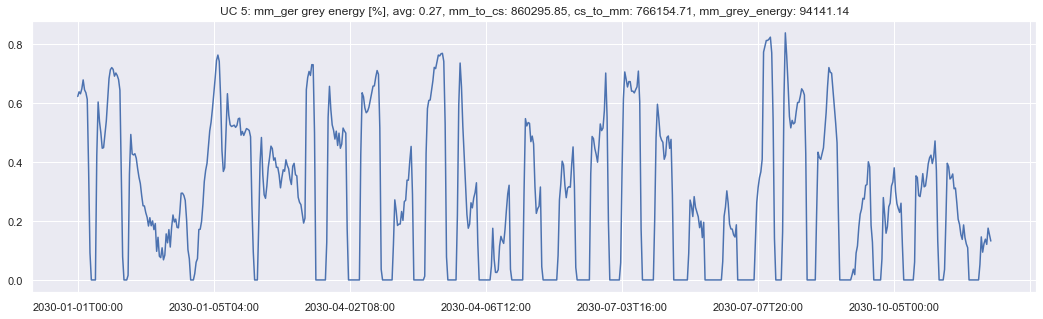

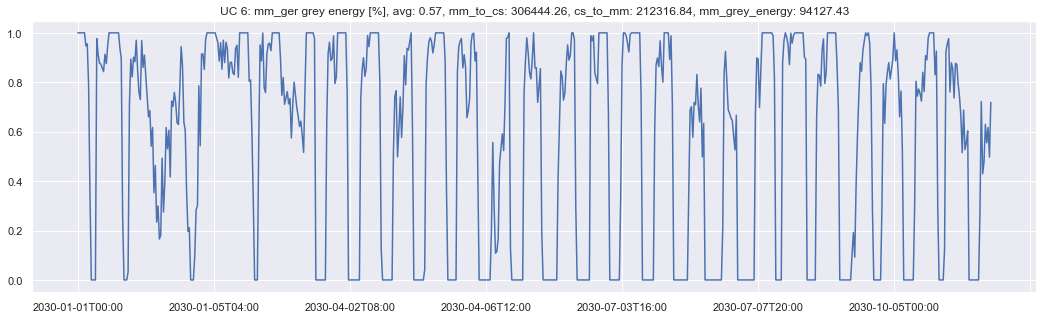

In [10]:
plot_mm_share('Base_Case/')
plot_mm_share('use_case_1/')
plot_mm_share('Use_Case_2/')
plot_mm_share('use_case_3/')
plot_mm_share('use_case_4/')
plot_mm_share('use_case_5/')
plot_mm_share('use_case_6/')